## Setup

In [1]:
# Data
import numpy as np
import pandas as pd 

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Stats 
import statsmodels.api as sm

In [2]:
# plot style set 
plt.style.use('ggplot')

## EDA analysis 

In [3]:
# Load the saved clean data 
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\apple_stock_clean.csv', index_col=[0])
apple.head()

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   

              Return  
1980-12-13  0.000000  
1980-12-14  0.000000  
1980-12-15 -0.052171  
1980-12-16 -0.073398  
1980-12-17  0.024751

In [4]:
# Change the index to datetime 
apple.index = pd.to_datetime(apple.index)
apple.index

DatetimeIndex(['1980-12-13', '1980-12-14', '1980-12-15', '1980-12-16',
               '1980-12-17', '1980-12-18', '1980-12-19', '1980-12-20',
               '1980-12-21', '1980-12-22',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23'],
              dtype='datetime64[ns]', length=15868, freq=None)

### Variable visualization -- data distribution

In [5]:
columns = list(apple.columns)
columns

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return']

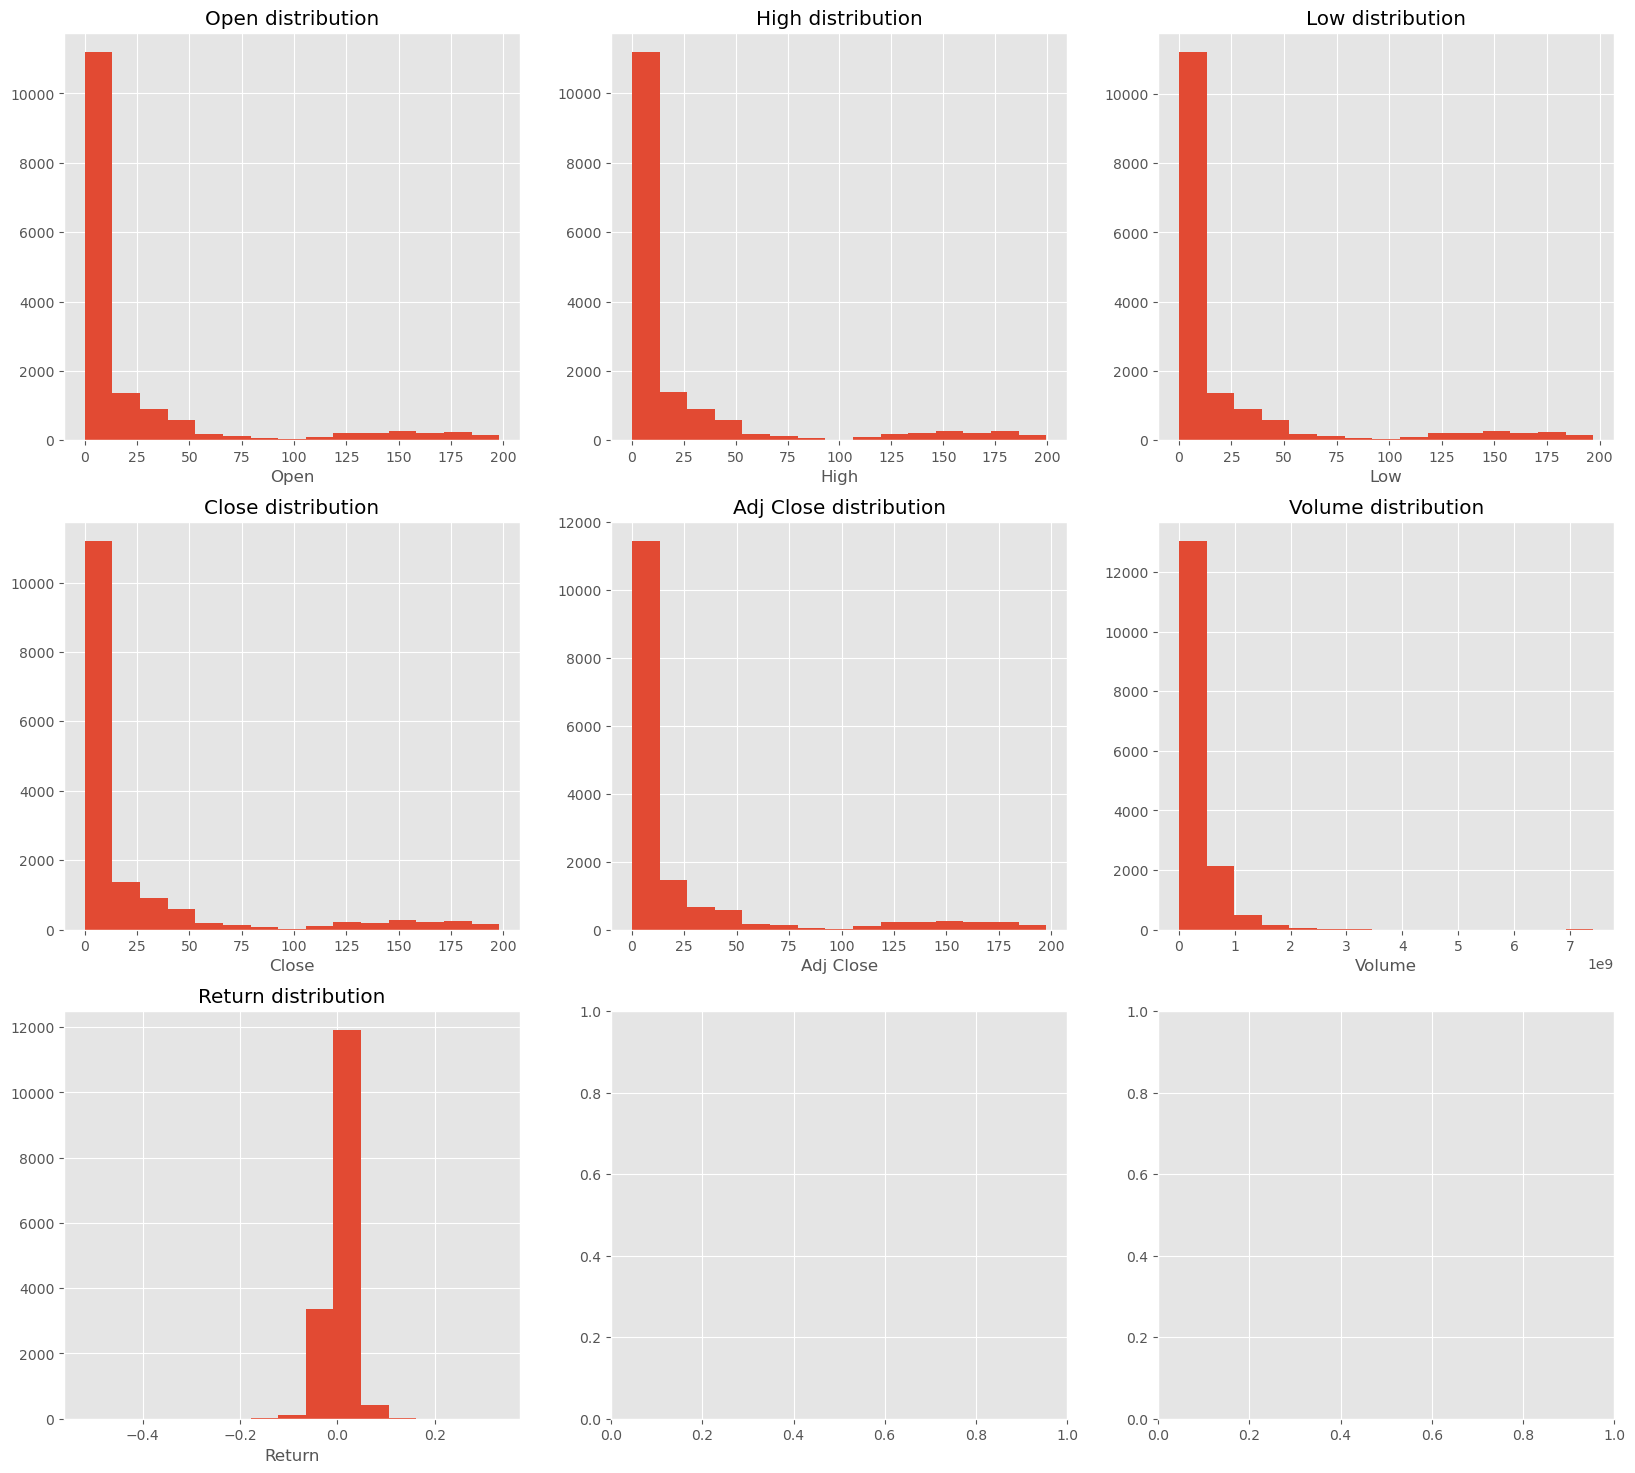

In [6]:
plt.subplots(3,3, figsize = (20,18))

for fig_id, cols in enumerate(columns, 1):
    plt.subplot(3,3,fig_id)
    plt.hist(x = apple[cols], bins = 15)
    plt.title(f'{cols} distribution')
    plt.xlabel(f'{cols}')
    



###  Variable visualization-time series 

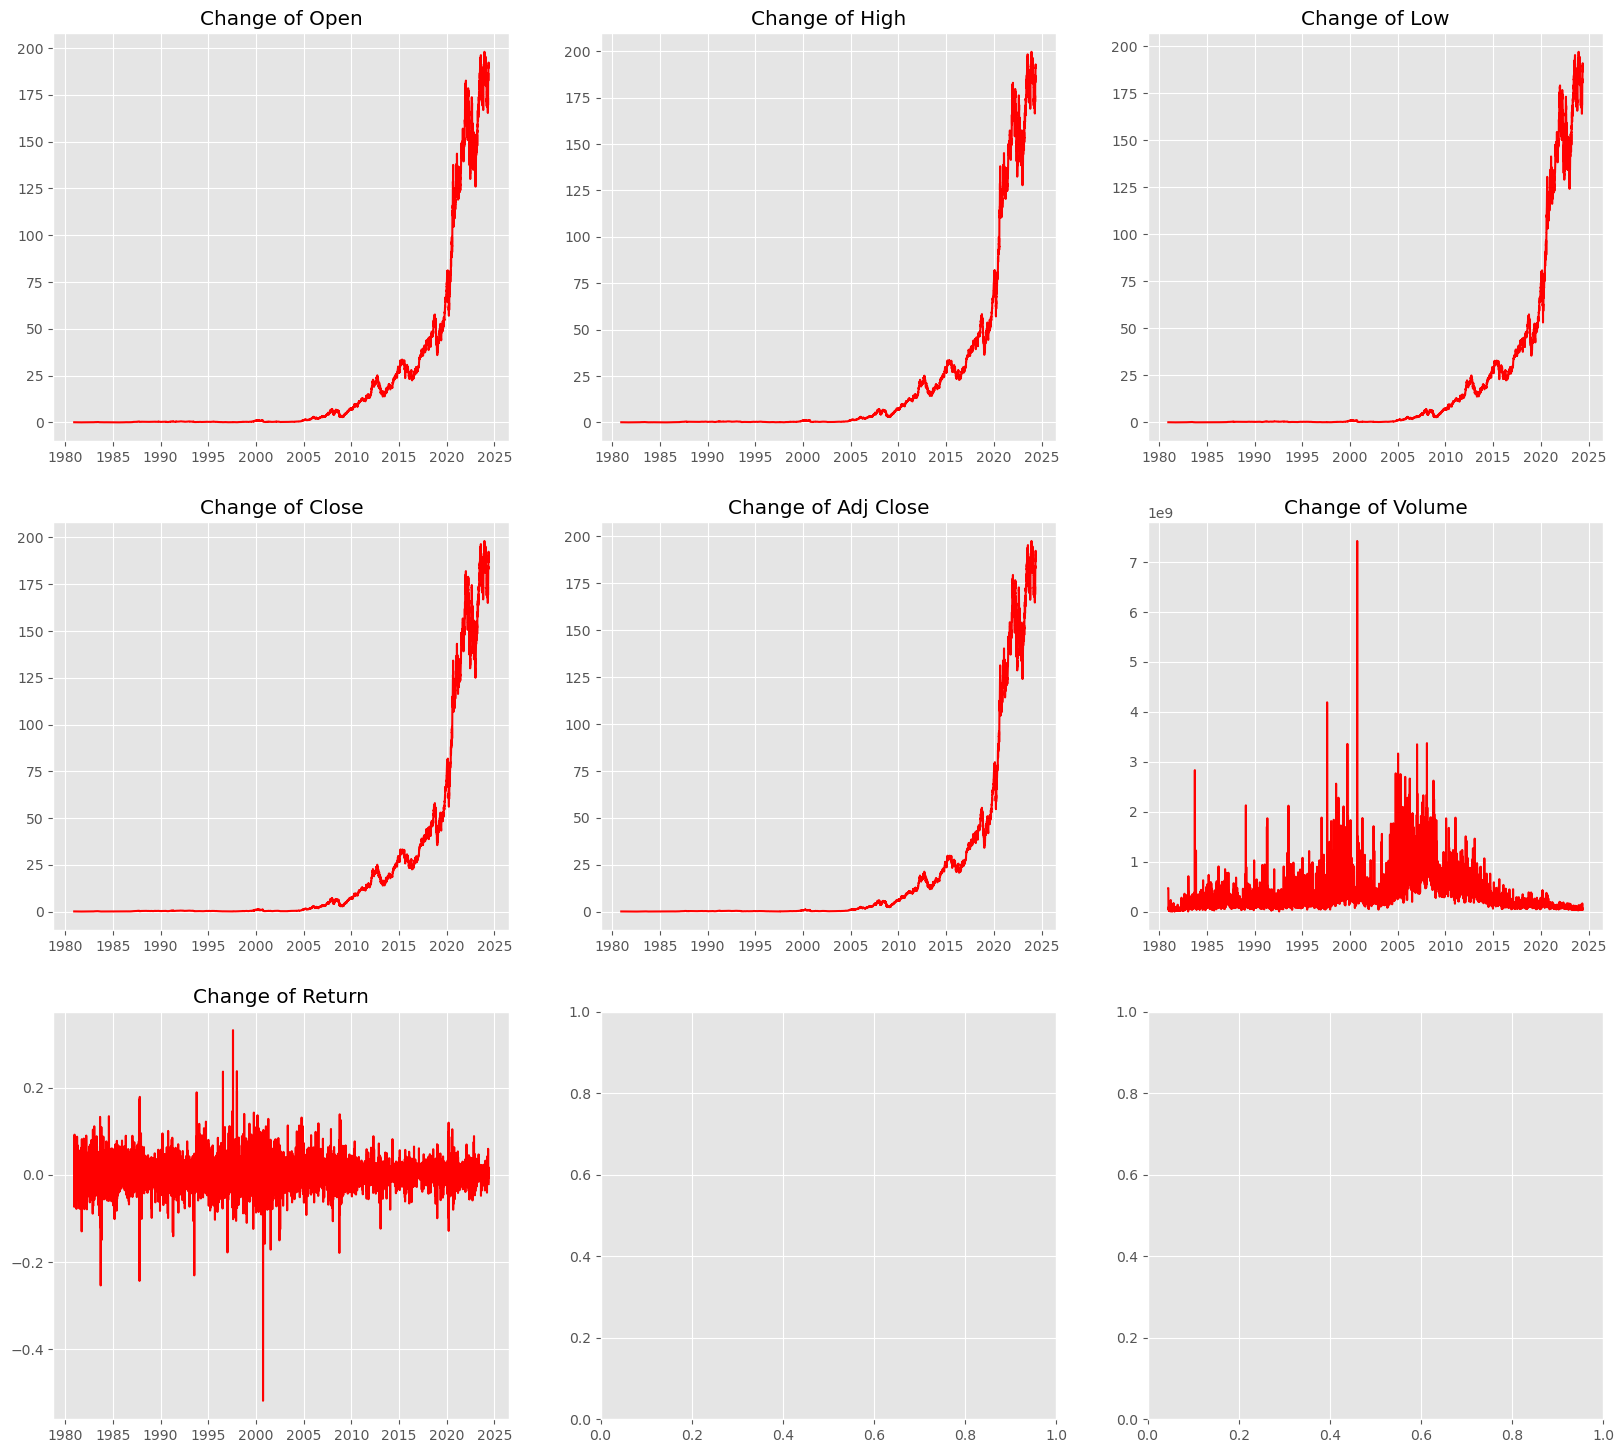

In [7]:
plt.subplots(3,3, figsize = (20,18))

for fig_id, cols in enumerate(columns, 1):
    plt.subplot(3,3,fig_id)
    plt.plot(apple.index, apple[cols], color = 'red')
    plt.title(f'Change of {cols}')


###  Target adding: positive return

In [8]:
apple.head()

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   

              Return  
1980-12-13  0.000000  
1980-12-14  0.000000  
1980-12-15 -0.052171  
1980-12-16 -0.073398  
1980-12-17  0.024751

In [9]:
apple['Target'] = np.where(apple['Return']>0, 1, 0)  # We should note here that if the price keep the same, there is no point for us to buy and sell the stock. 
apple['Target'].value_counts()

Target
0    10421
1     5447
Name: count, dtype: int64

In [10]:
# apple.to_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\apple_after_eda.csv')

## Time series EDA 

A fundamental step in time series EDA is the trend-seasonal decomposition. Here, we extract three series from our original observation: 
- a trend component $T_t$ calculated using a moving average,
- a seasonal component $S_t$ which is the monthly/daily average of the de-trended series, and
- the residual $R_t$ that remains after subtracting the trend and seasonal component from the original series.

Adding up these three components will give back the original series:

$$y_t = T_t + S_t + R_t$$

There are different approaches for computing the trend and seasonal components, but the most standard method is implemented by the `seasonal_decompose` function from the time series analysis module of `statsmodels`. 

**Note**: In order to do this, we must have the date index so that the decomposition can infer the seasonality.

In [12]:
apple

Open        High         Low       Close   Adj Close  \
1980-12-13    0.128348    0.128906    0.128348    0.128348    0.099058   
1980-12-14    0.128348    0.128906    0.128348    0.128348    0.099058   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093890   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086998   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089152   
...                ...         ...         ...         ...         ...   
2024-05-19  189.509995  190.809998  189.179993  189.869995  189.869995   
2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   

                 Volume    Return  Target  
1980-12-13  469033600.0  0.000000       0  
1980-12-14  469033600.0  0.000000       0  
1980-12-15  175884800.0 -0.052171       0  
1980-12-16  105728000.0 -0.073398       0  
1980-12-17   86441600.0  0.024751       1  
...                 ...       ...     ...  
2024-05-19   41282900.0  0.000000       0  
2024-05-20   44361300.0  0.006162       1  
2024-05-21   42309400.0  0.006857       1  
2024-05-22   34648500.0 -0.007538       0  
2024-05-23   50944900.0 -0.021058       0  

[15868 rows x 8 columns]

In [32]:
from statsmodels.api import tsa # time series analysis

# decompose the time series
decomposition = tsa.seasonal_decompose(apple[['Adj Close']], model='additive', period=252)

# add the decomposition data to the apple data

apple["Trend"] = decomposition.trend
apple["Seasonal"] = decomposition.seasonal
apple["Residual"] = decomposition.resid

apple.head(10)

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600.0   
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-20  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-21  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-22  0.132254  0.132813  0.132254  0.132254   0.102072   37363200.0   

              Return  Target  Trend  Seasonal  Residual  
1980-12-13  0.000000       0    NaN -0.708903       NaN  
1980-12-14  0.000000       0    NaN -0.721181       NaN  
1980-12-15 -0.052171       0    NaN -0.726196       NaN  
1980-12-16 -0.073398       0    NaN -0.672802       NaN  
1980-12-17  0.024751       1    NaN -0.822246       NaN  
1980-12-18  0.028992       1    NaN -0.832904       NaN  
1980-12-19  0.061029       1    NaN -0.744794       NaN  
1980-12-20  0.000000       0    NaN -0.756651       NaN  
1980-12-21  0.000000       0    NaN -0.768509       NaN  
1980-12-22  0.048670       1    NaN -0.599876       NaN

The null values are due the fact that the trend component is calculated with a rolling average that is not defined at the beginning and end of the series.

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['Adj Close', "Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=apple.index, y=apple[col]),
        row=i+1,
        col=1
    )
    
fig.update_layout(height=1200, width=1200, showlegend=False)
fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness=0.02)
fig.show()